In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy

sympy.init_printing()

# Aufgabe 1b

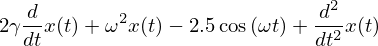

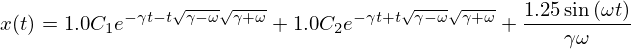

x{\left (t \right )} = 1.0 C_{1} e^{- \gamma t - t \sqrt{\gamma - \omega} \sqrt{\gamma + \omega}} + 1.0 C_{2} e^{- \gamma t + t \sqrt{\gamma - \omega} \sqrt{\gamma + \omega}} + \frac{1.25 \sin{\left (\omega t \right )}}{\gamma \omega}


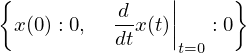

In [5]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

t, gamma, omega = sympy.symbols("t gamma omega", positive = True)
F , m = 5,2
x = sympy.Function("x")

dgl = x(t).diff(t,2)+ 2 * gamma * x(t).diff(t,1) + omega**2 * x(t) - F / m * sympy.cos(omega * t)
display(dgl)
display(sympy.simplify(sympy.dsolve(dgl)))
print(sympy.printing.latex(sympy.simplify(sympy.dsolve(dgl))))
ics = {x(0): 0,x(t).diff(t).subs(t, 0): 0}
display(ics)

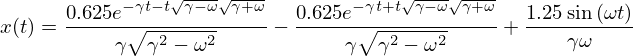

x{\left (t \right )} = \frac{0.625 e^{- \gamma t - t \sqrt{\gamma - \omega} \sqrt{\gamma + \omega}}}{\gamma \sqrt{\gamma^{2} - \omega^{2}}} - \frac{0.625 e^{- \gamma t + t \sqrt{\gamma - \omega} \sqrt{\gamma + \omega}}}{\gamma \sqrt{\gamma^{2} - \omega^{2}}} + \frac{1.25 \sin{\left (\omega t \right )}}{\gamma \omega}


In [6]:
dgl_sol = sympy.simplify(sympy.dsolve(dgl))
sol = apply_ics(dgl_sol, ics, t, [omega, gamma])
display(sol)
print(sympy.printing.latex(sol))

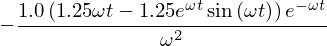

In [8]:
x_critical = sympy.limit(sol.rhs, gamma, omega)
display(x_critical)

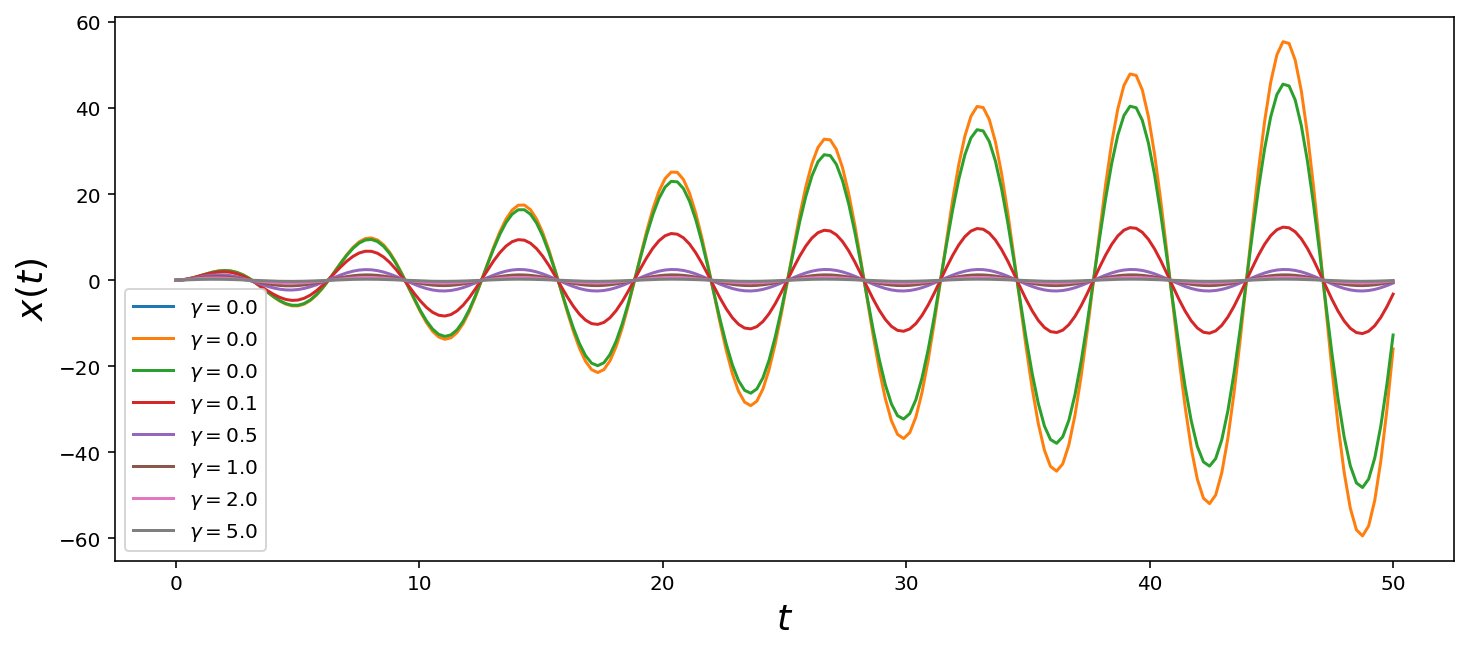

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))

x = np.linspace(0,50,200)
for g in [0,0.001,0.01,0.1, 0.5,1.0, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t,x_critical.subs({omega: 1.0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, sol.rhs.subs({gamma: g, omega: 1.0}),"numpy")
    ax.plot(x, x_t(x).real, label=r"$\gamma = %.1f$" % g)
    
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()



# Aufgabe 2c

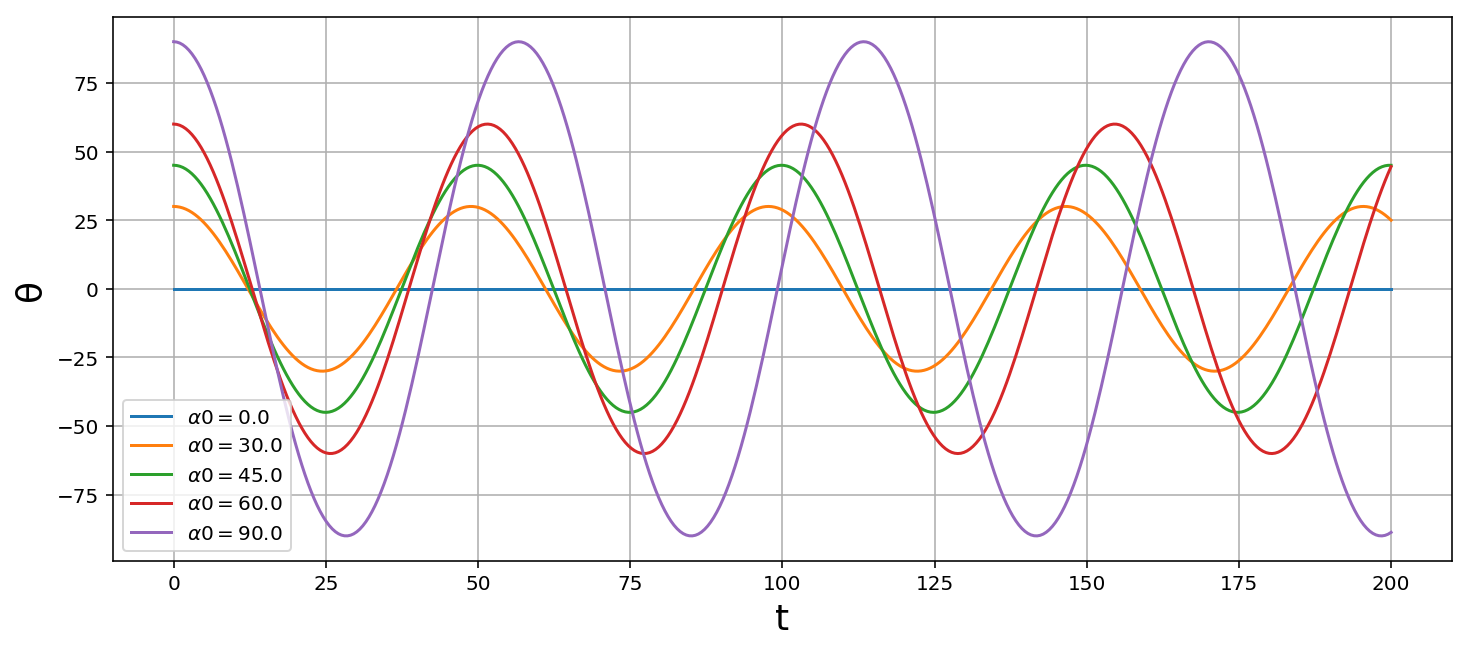

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))

g = 9.81
l = 10
t = np.linspace(0,200,400)

def dg(z,t):
    return [z[1], -g/l * np.sin(np.radians(z[0]))]

for alpha0 in [0, 30,45,60, 90]:
    z0 = [alpha0, 0]
    z = odeint(func=dg, y0=z0, t=t)
    ax.plot(t,z[:,0],label=r"$\alpha0 = %.1f$" % alpha0 )

ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("θ",fontsize=18)
plt.legend()
plt.grid()
plt.show()
fig.savefig("2c.png")

# Aufgabe 2d

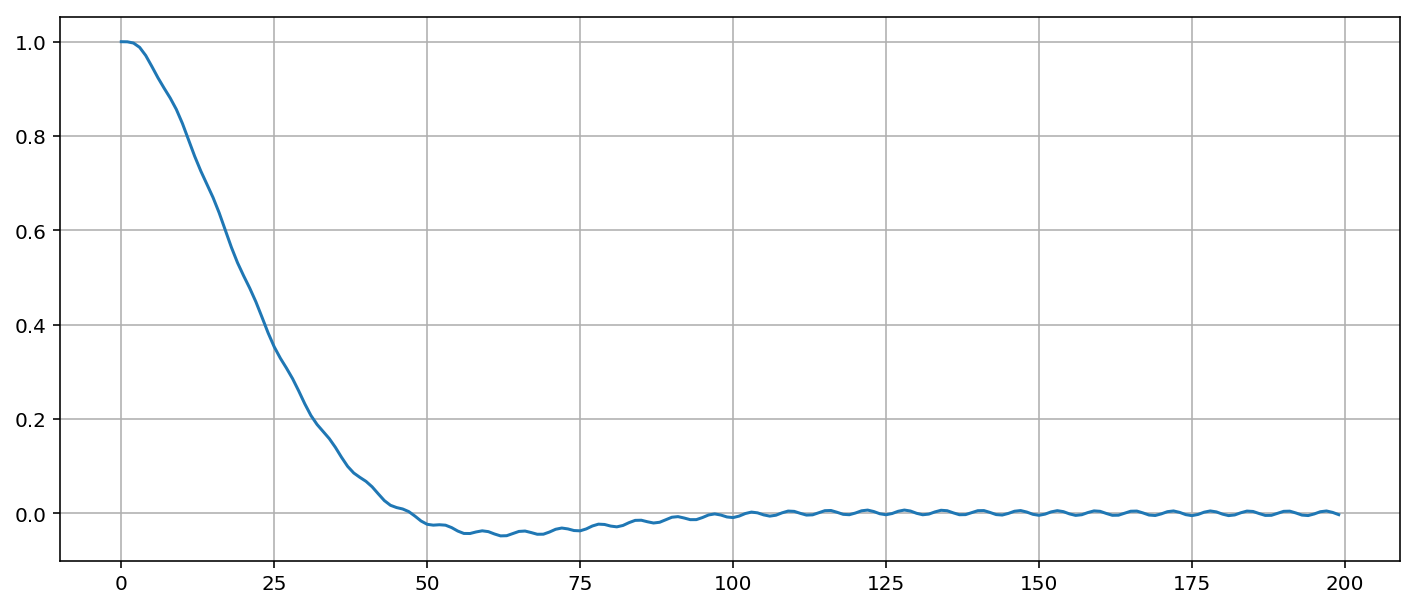

In [39]:
fig, ax = plt.subplots(figsize=(12, 5))

m = 0.5
c = 1
D = 1
om = 20
F = 1
t = np.linspace(0,10,200)

def dgl(z,t,om):
    z0 = z[0]
    z1 = z[1]
    z2 = (F * np.cos(om * t) - c * z1 - D * z0) / m
    return z1, z2

sol = odeint(func=dgl, t=t, y0=[1,0],args=(om,))

ax.plot(sol[:,0])
plt.grid()


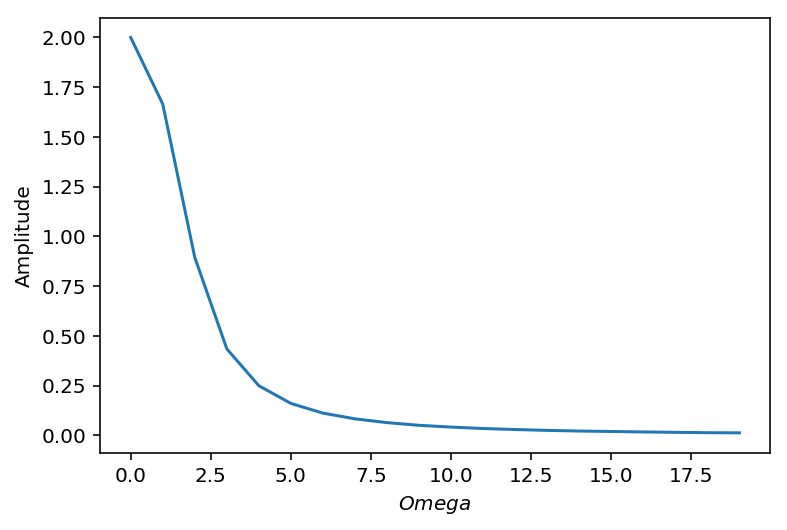

In [36]:
def get_amplitude(arr):
    # Parameter arr: Schwingung im eingeschwungenen Zustand
    return abs(arr.min()) + abs(arr.max())
amp = []
omega_list = range(0,20,1)
for omega in omega_list:
    func = odeint(func=dgl,t=t,y0=[1,0],args=(omega,))
    amp.append(get_amplitude(func[125:,0]))

plt.plot(omega_list,amp)
plt.xlabel("$Omega$")
plt.ylabel("Amplitude")


Text(0, 0.5, 'Distanz')

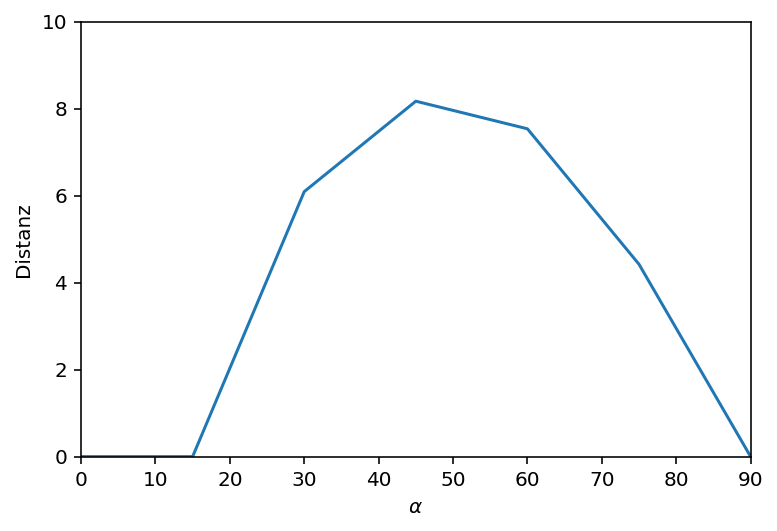

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Anfangsbedingungen

# Vektor - z[0]: y, z[1]: v_y, z[2]: x, z[3]: v_x
z0 = [0,5,0,0]

g = 9.81

#Die Zeit
t0 = np.linspace(0,10,200)

def x(z,t):
    x0 = z[0]
    x1 = z[1]
    x2 = z[2]
    x3 = z[3]
    return [x1,-g,x3,0]

    
sol = odeint(x,z0,t0)
#plt.plot(sol[:,2],sol[:,0])
#plt.ylim(0,10)

def get_root(y):  # Array der y-Werte
    index = 0
    y = y[5:]
    for elem in y:
        nullpoint = -1
        if elem < 0.4 and elem > -0.4:
            nullpoint = index
            break
        index += 1
    return nullpoint

roots = []

for alpha in range(0,105,15):
    delta_x = 10 * np.cos(np.radians(alpha))   
    delta_y = 10 * np.sin(np.radians(alpha))
    
    inter_sol = odeint(func = x, y0 = [0,delta_y,0,delta_x],t = t0)
    y_range = inter_sol[:,0]
    x_range = inter_sol[:,2]
    
    y_nullpoint = get_root(y_range)
    x_nullpoint = x_range[y_nullpoint]
    
    roots.append(x_nullpoint)
    

plt.plot(range(0,105,15),roots)
plt.ylim(0,10)
plt.xlim(0,90)
plt.xlabel(r"$\alpha$")
plt.ylabel("Distanz")